# 1083 Albumin Initial ML

### By: Ian Weimer

In [57]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [59]:
df = pd.read_csv('N04_matched.csv')

In [60]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

## Select Only Patients Who Lived (Removing Patients in 0 Class Who Died)

In [61]:
df = df.loc[df['90_day_mortality'] == 0]

In [62]:
df.shape

(2934, 16)

In [63]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   propensity_score  propensity_logit  albumin_24hrs  \
0          0.635797          0.557167              1   
1          0.370413         -0.530446              1   
2          0.855310          1.776873              1   
3          0.671801          0.716343              1   
4          0.676695          0.738624              1   

                               personid  LOS_days  90_day_mortality  \
0  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  0.743750                 0   
1  21b88c50-de34-435d-8c60-357d6d8ca892  6.963056                 0   
2  40cd7ee5-00d8-45af-8781-7ea6e956d8e9  4.140972                 0   
3  48531d48-8a10-46f1-b80d-252e08c651cd  1.348611                 0   
4  6ee7780f-14d7-4733-a47f-0b6c97e32870  9.985417                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 1.0                  36             1.0        1  
1                 0.0                  83             2.0        1  
2                 0.0                  14             2.0        1  
3                 0.0                   4             1.0        1  
4                 1.0                   9             2.0        1

In [64]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    1454.000000
mean        7.641492
std        10.691636
min         0.099306
25%         2.566334
50%         4.508385
75%         8.732115
max       119.877778
Name: LOS_days, dtype: float64

In [65]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    1480.000000
mean        6.507624
std        10.175464
min         0.000000
25%         0.631065
50%         3.557292
75%         8.096218
max       112.316331
Name: LOS_days, dtype: float64

In [66]:
df[df['albumin_24hrs'] == 1].hospital_free_days.describe()

count    1454.000000
mean       46.038514
std        32.358750
min         0.000000
25%        13.000000
50%        45.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [67]:
df[df['albumin_24hrs'] == 0].hospital_free_days.describe()

count    1480.000000
mean       44.191892
std        32.950508
min         0.000000
25%        12.000000
50%        38.000000
75%        80.250000
max        90.000000
Name: hospital_free_days, dtype: float64

In [68]:
df.drop(columns=['propensity_score', 'propensity_logit', 'encounterid', 'personid', 'albumin', 'albumin_timing'], inplace=True)

In [69]:
df.drop(columns=['90_day_mortality', '90_day_readmission', 'LOS_days'], inplace=True)

In [70]:
df.shape

(2934, 7)

In [71]:
df.describe()

ICU    Cirrhosis          CCI        qSOFA        SEWS  \
count  2934.000000  2934.000000  2934.000000  2934.000000  2934.00000   
mean      0.098841     0.195297     3.042945     0.450579     1.06135   
std       0.298500     0.396496     2.558193     0.587497     1.41794   
min       0.000000     0.000000     0.000000     0.000000     0.00000   
25%       0.000000     0.000000     0.000000     0.000000     0.00000   
50%       0.000000     0.000000     3.000000     0.000000     1.00000   
75%       0.000000     0.000000     5.000000     1.000000     2.00000   
max       1.000000     1.000000    14.000000     3.000000     9.00000   

       albumin_24hrs  hospital_free_days  
count    2934.000000         2934.000000  
mean        0.495569           45.107021  
std         0.500066           32.666080  
min         0.000000            0.000000  
25%         0.000000           13.000000  
50%         0.000000           42.000000  
75%         1.000000           81.000000  
max         1.000000           90.000000

In [72]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [73]:
#df['LOS_days'] = df['LOS_days']/24
#df.drop(columns=['LOS_days'], inplace=True)

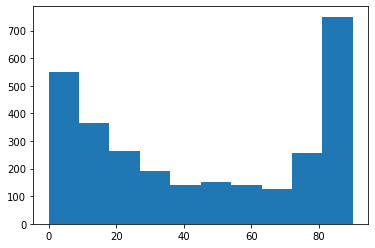

In [74]:
plt.hist(df['hospital_free_days']);

In [75]:
df['hospital_free_days'].describe()

count    2934.000000
mean       45.107021
std        32.666080
min         0.000000
25%        13.000000
50%        42.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [76]:
# Calculate Tertiles

q1 = df['hospital_free_days'].quantile(q=(1/3))
q2 = df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

20.0
73.0


In [21]:
# bin the LOS_days var

HFD = df['hospital_free_days']
m = max(HFD)

bins = [0, 20, 73, m]
labels=[0, 1, 2]

# 0 - Low HFD
# 1 - Medium HFD
# 2 - High/Long HFD

df['hospital_free_days'] = pd.cut(HFD, bins=bins, labels=labels, include_lowest=True)

In [22]:
df['hospital_free_days'].value_counts()

0    998
1    971
2    965
Name: hospital_free_days, dtype: int64

### Check DT conditions

In [77]:
df['hospital_free_days'].describe()

count    2934.000000
mean       45.107021
std        32.666080
min         0.000000
25%        13.000000
50%        42.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [78]:
s_group1 = df.loc[(df['CCI'] > 1.5) & (df['albumin_24hrs'] > 0.5)]

In [79]:
s_group1['hospital_free_days'].describe()

count    741.000000
mean      43.882591
std       32.097251
min        0.000000
25%       11.000000
50%       42.000000
75%       78.000000
max       90.000000
Name: hospital_free_days, dtype: float64

In [80]:
s_group1_control = df.loc[(df['CCI'] < 1.5) & (df['albumin_24hrs'] < 0.5)]

In [81]:
s_group1_control['hospital_free_days'].describe()

count    272.000000
mean      57.500000
std       32.065431
min        0.000000
25%       25.000000
50%       70.000000
75%       88.000000
max       90.000000
Name: hospital_free_days, dtype: float64

## Modeling

In [23]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [24]:
cols

Index(['ICU', 'Cirrhosis', 'CCI', 'qSOFA', 'SEWS', 'albumin_24hrs'], dtype='object')

## Standardize Data

In [25]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [26]:
X.head()

ICU  Cirrhosis  CCI  qSOFA  SEWS  albumin_24hrs
0    0          0    0      1     2              1
1    0          0    1      0     0              1
2    0          1    0      1     2              1
3    0          0    0      1     3              1
4    0          0    4      1     3              1

In [27]:
X.shape

(2934, 6)

## Train Test Split

In [77]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [78]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [28]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [29]:
y_train.value_counts()

2    792
0    787
1    768
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [30]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.20261
Feature: Cirrhosis Score: -0.07168
Feature: CCI Score: 0.04498
Feature: qSOFA Score: -0.03354
Feature: SEWS Score: 0.01774
Feature: albumin_24hrs Score: -0.04201


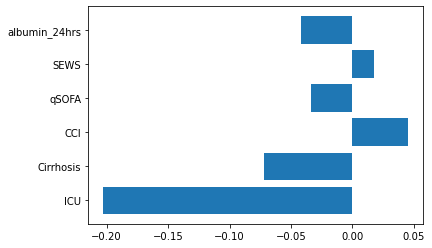

In [31]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
CCI              1.046008
SEWS             1.017902
qSOFA            0.967020
albumin_24hrs    0.958859
Cirrhosis        0.930827
ICU              0.816593


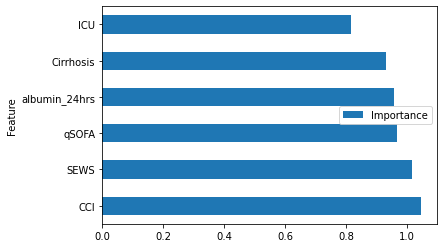

In [32]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [33]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [34]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[404  88 295]
 [340  97 331]
 [309  84 399]]


In [35]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.38      0.51      0.44       787
           1       0.36      0.13      0.19       768
           2       0.39      0.50      0.44       792

    accuracy                           0.38      2347
   macro avg       0.38      0.38      0.36      2347
weighted avg       0.38      0.38      0.36      2347



In [36]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[113  28  70]
 [ 87  24  92]
 [ 66  21  86]]


In [37]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.42      0.54      0.47       211
           1       0.33      0.12      0.17       203
           2       0.35      0.50      0.41       173

    accuracy                           0.38       587
   macro avg       0.37      0.38      0.35       587
weighted avg       0.37      0.38      0.35       587



## 1: Decision Tree 

In [38]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: ICU Score: 0.04365
Feature: Cirrhosis Score: 0.00000
Feature: CCI Score: 0.52272
Feature: qSOFA Score: 0.00000
Feature: SEWS Score: 0.21499
Feature: albumin_24hrs Score: 0.21864


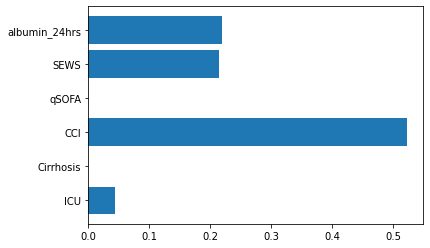

In [39]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [40]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [41]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[414 227 146]
 [296 299 173]
 [283 242 267]]


In [42]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47       787
           1       0.39      0.39      0.39       768
           2       0.46      0.34      0.39       792

    accuracy                           0.42      2347
   macro avg       0.42      0.42      0.41      2347
weighted avg       0.42      0.42      0.41      2347



In [43]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[92 76 43]
 [89 69 45]
 [63 58 52]]


In [44]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.38      0.44      0.40       211
           1       0.34      0.34      0.34       203
           2       0.37      0.30      0.33       173

    accuracy                           0.36       587
   macro avg       0.36      0.36      0.36       587
weighted avg       0.36      0.36      0.36       587



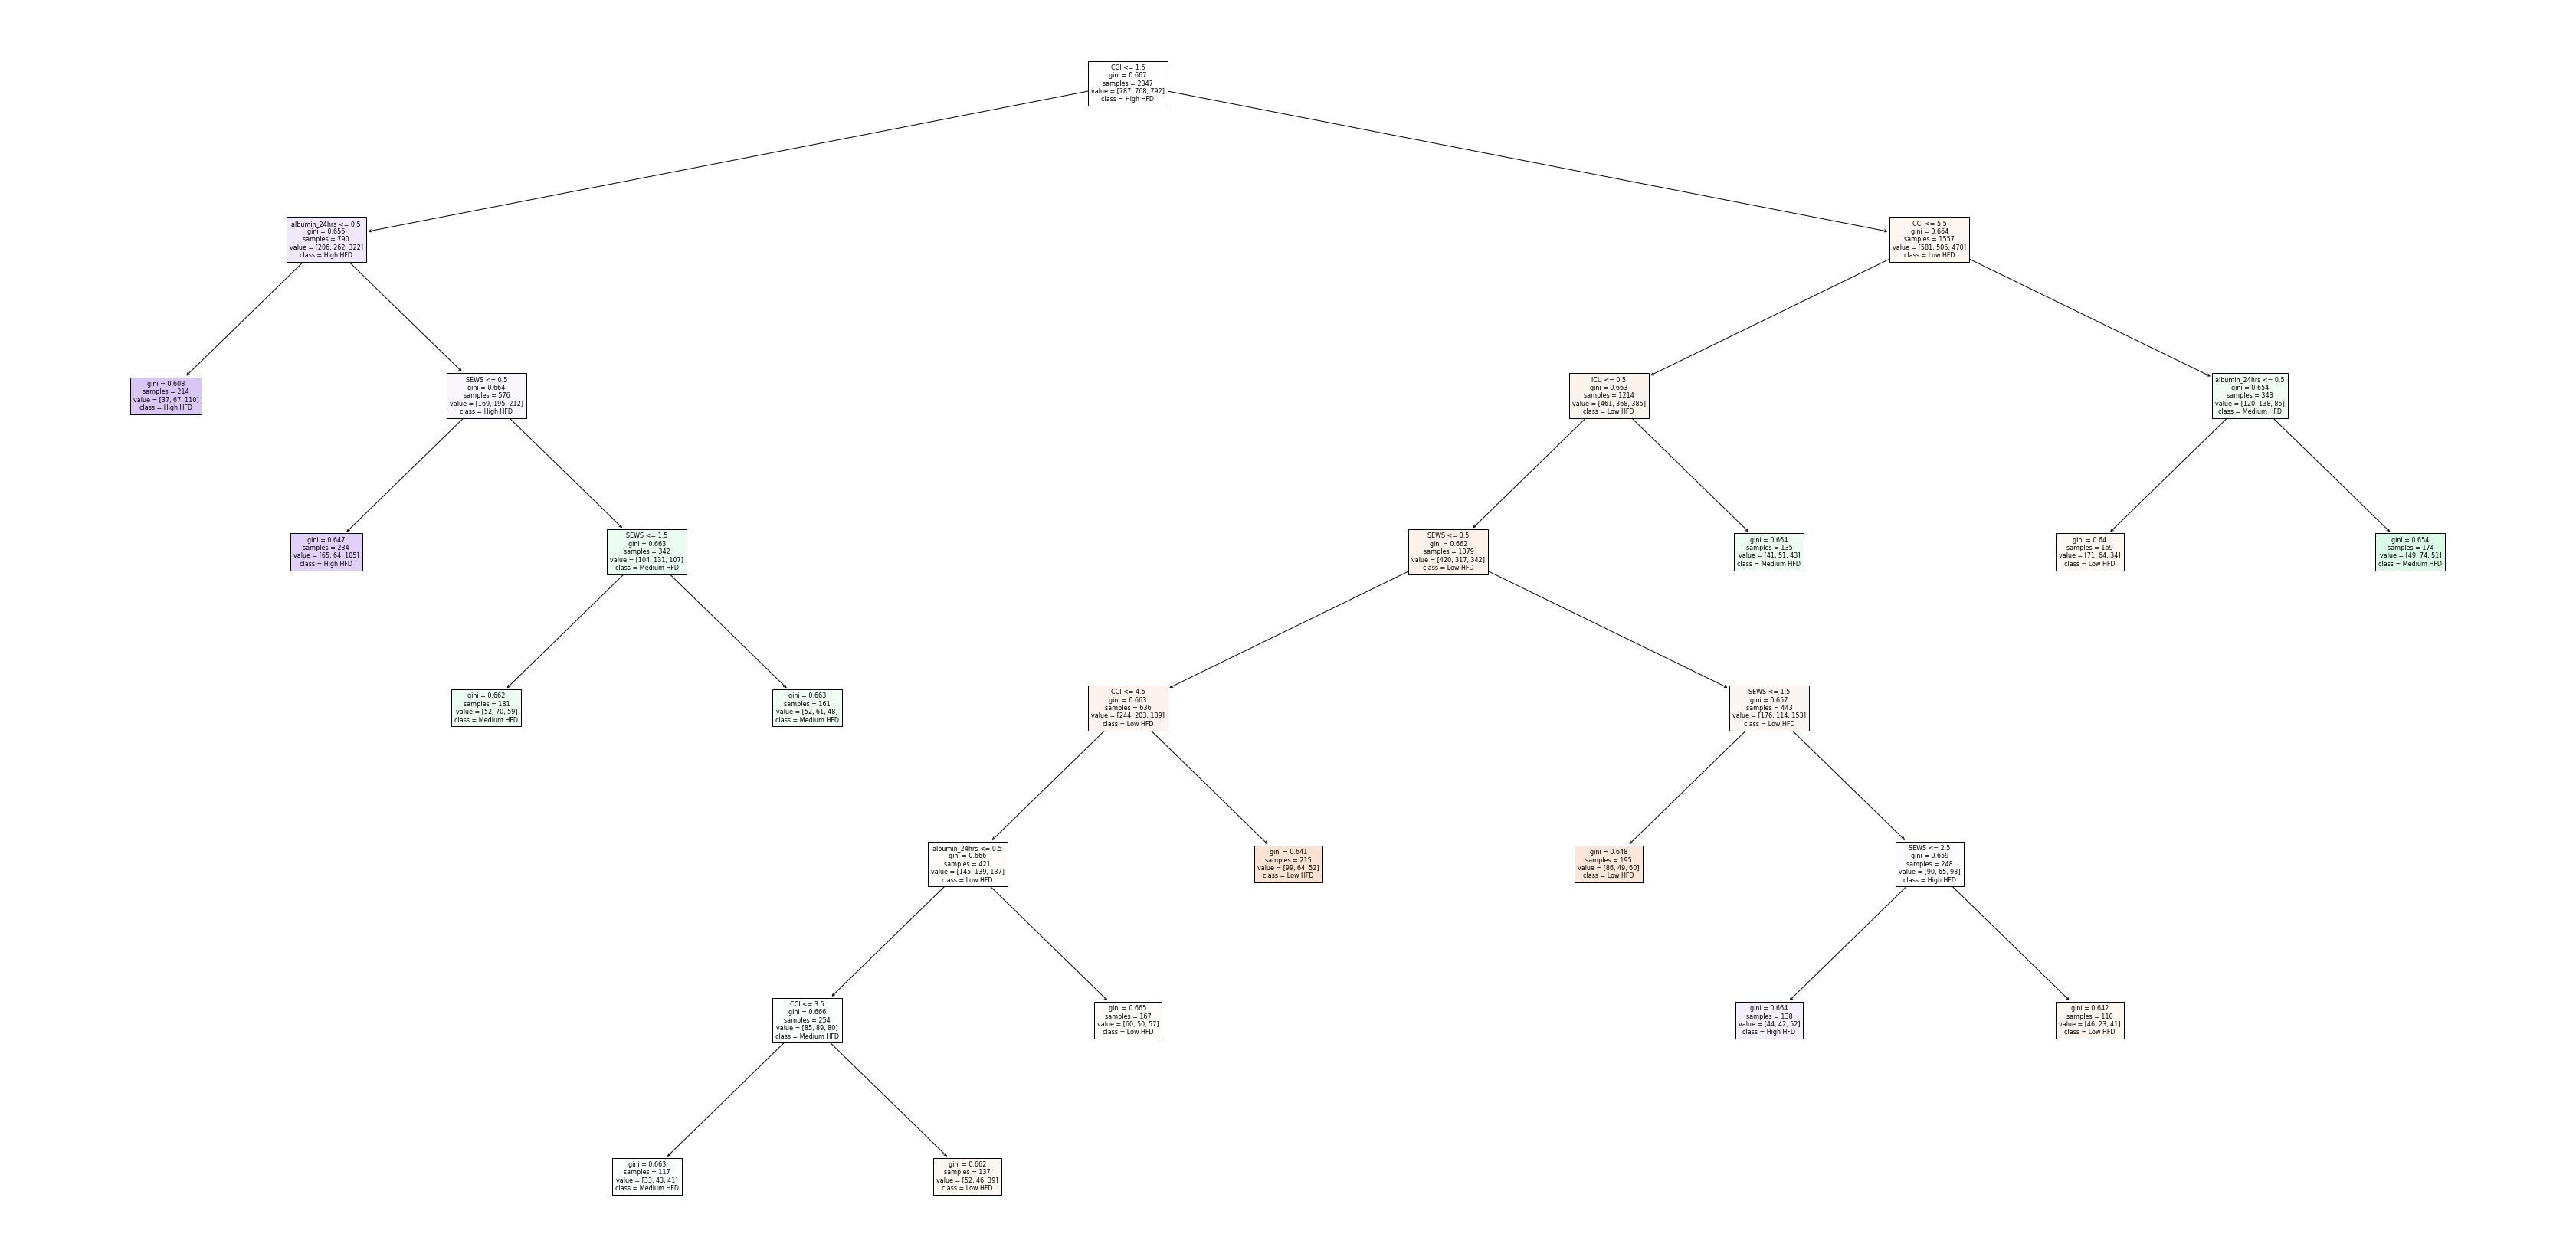

In [45]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [46]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D7_PSM_MATCHED.png')

True

## Random Forest

In [47]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [48]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [49]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[487 123 177]
 [370 177 221]
 [367 133 292]]


In [50]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.40      0.62      0.48       787
           1       0.41      0.23      0.29       768
           2       0.42      0.37      0.39       792

    accuracy                           0.41      2347
   macro avg       0.41      0.41      0.39      2347
weighted avg       0.41      0.41      0.39      2347



In [51]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[129  38  44]
 [ 95  53  55]
 [ 75  31  67]]


In [52]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.61      0.51       211
           1       0.43      0.26      0.33       203
           2       0.40      0.39      0.40       173

    accuracy                           0.42       587
   macro avg       0.42      0.42      0.41       587
weighted avg       0.42      0.42      0.41       587



Feature: ICU Score: 0.03454
Feature: Cirrhosis Score: 0.02935
Feature: CCI Score: 0.58012
Feature: qSOFA Score: 0.08082
Feature: SEWS Score: 0.12139
Feature: albumin_24hrs Score: 0.15378


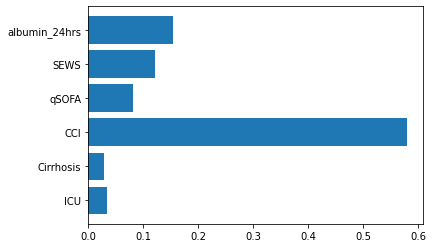

In [53]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()